<a href="https://colab.research.google.com/github/Burgunthy/Stock_Project/blob/main/Pandas_data_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [10]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt

In [5]:
yf.pdr_override()

In [6]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997


In [8]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.879868,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.903320,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.507462,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.598503,27327400
2018-05-10,97.459999,97.949997,97.050003,97.910004,94.535065,22388100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


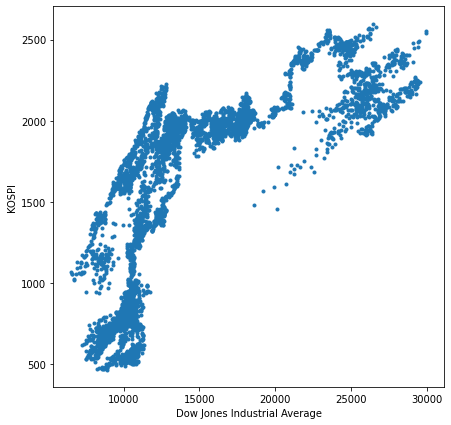

In [11]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

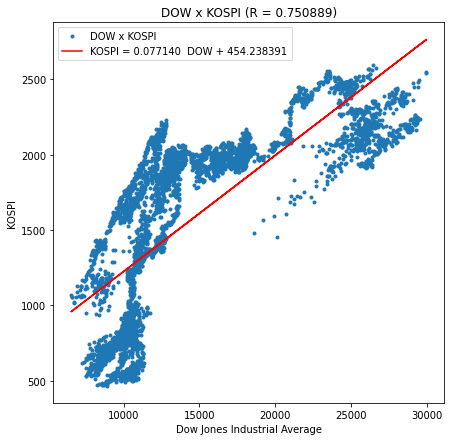

In [13]:
regr = stats.linregress(df.DOW, df.KOSPI)
regr_line = f'KOSPI = {regr.slope:2f}  DOW + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.DOW, df.KOSPI, '.') 
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()